# Análisis de Campañas de Marketing

En esta notebook se realiza un análisis detallado de las campañas de marketing de Peliplat, evaluando su efectividad, alcance y retorno de inversión. Se estudian diferentes métricas de conversión, engagement y adquisición de usuarios para identificar las estrategias más exitosas y oportunidades de mejora.

## 1. Setup inicial

En esta sección se configura el entorno para el análisis de campañas de marketing. Se importan:

- Librerías base para análisis y visualización de datos
- Módulo específico `campaigns.py` con funciones especializadas para:
  - Preparación de datos de campañas
  - Cálculo de métricas de eficiencia
  - Visualización de CTR y conversiones
  - Análisis de calidad de usuarios adquiridos
- Se cargan los datasets procesados necesarios para el análisis completo de campañas y su impacto

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')
from utils.utils_peliplat import *
from src.analysis.campaigns import (
    preparar_datos_campanas,
    calcular_eficiencia_campanas, 
    graficar_ctr_conversion,
    graficar_registros_diarios,
    calcular_calidad_usuarios
)

# Configurar el estilo
configurar_estilo_peliplat()

# Cargar datos
users = pd.read_csv('../data/processed/peliplat_users_clean.csv')
activity = pd.read_csv('../data/processed/peliplat_activity_clean.csv')
engagement = pd.read_csv('../data/processed/peliplat_engagement_clean.csv')
content = pd.read_csv('../data/processed/peliplat_content_clean.csv')
campaigns = pd.read_csv('../data/processed/peliplat_campaigns_clean.csv')

## 2. Resumen general de campañas

En esta sección se realiza un análisis inicial del rendimiento de las campañas mediante:

- Preparación y limpieza de datos de campañas
- Generación de tabla resumen con métricas clave:
  - Clicks totales por campaña
  - Registros conseguidos
  - CTR (Click-Through Rate)
  - Tasa de conversión
  - Promedio diario de registros
- Los resultados se guardan en formato HTML para su inclusión en el informe final

In [15]:
# Preparar datos y calcular métricas
campaigns = preparar_datos_campanas(campaigns)

# Mostrar resumen de campañas
resumen_df = campaigns[['name', 'clicks', 'signups', 'CTR', 'conversion_rate', 'daily_signups']].round(2)
mostrar_tabla(
    resumen_df,
    titulo="Resumen de Rendimiento de Campañas",
    guardar=True,
    nombre_archivo="resumen_campanas.html"
)


Resumen de Rendimiento de Campañas


,name,clicks,signups,CTR,conversion_rate,daily_signups
0,Campaña_1,961,128,0.11,13.32,12.80
1,Campaña_2,353,70,0.18,19.83,6.36
2,Campaña_3,729,166,0.18,22.77,20.75
3,Campaña_4,809,189,0.08,23.36,23.62
4,Campaña_5,948,54,0.17,5.70,3.60


Tabla guardada en HTML: ../reports/tables\resumen_campanas.html
Tabla guardada en PNG: ../reports/tables\resumen_campanas.png


### Visualización Comparativa: CTR vs. Tasa de Conversión por Campaña

Se invoca la función `graficar_ctr_conversion` (definida en `src/analysis/campaigns.py`) para generar un gráfico de barras agrupadas. Este gráfico permite comparar visualmente la Tasa de Clics (CTR) y la Tasa de Conversión para cada campaña publicitaria.

La función utiliza `matplotlib` para:
- Representar cada campaña en el eje X.
- Mostrar dos barras por campaña: una para el CTR (%) y otra para la Tasa de Conversión (%).
- Incluir etiquetas de valor sobre cada barra para una lectura precisa.
- Aplicar una paleta de colores definida (`PALETA_MARCA`).

El gráfico resultante se guarda como `campanas_ctr_conversion.png` en el directorio correspondiente (gestionado por la función `guardar_figura`) y se muestra a continuación.

Figura guardada en: ../reports/figures\campanas_ctr_conversion.png


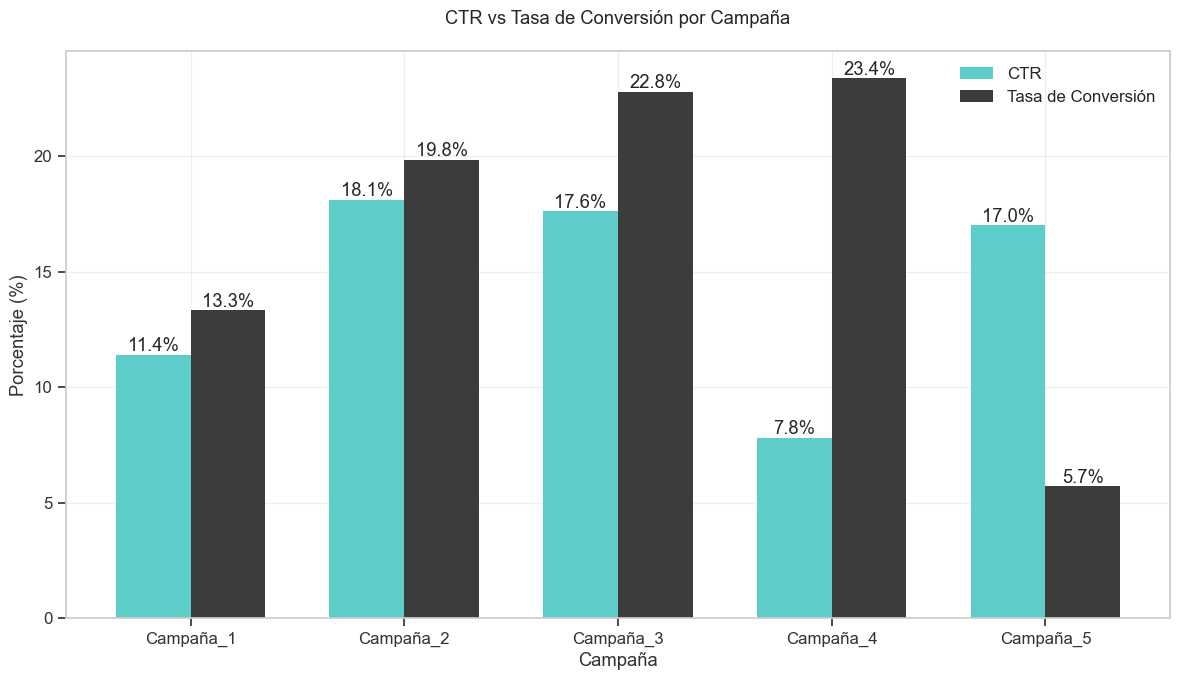

In [16]:
# Visualizar CTR vs Tasa de Conversión
graficar_ctr_conversion(campaigns, 'campanas_ctr_conversion.png')
plt.show()

### Análisis de Eficiencia y Registros Diarios por Campaña

Primero, se calculan las métricas de eficiencia para cada campaña utilizando la función `calcular_eficiencia_campanas` del módulo `src/analysis/campaigns`. Esta función devuelve un DataFrame que incluye la duración de la campaña, el total de registros (signups) y el promedio de registros diarios.

A continuación, este DataFrame de eficiencia se presenta en formato de tabla mediante la función `mostrar_tabla`. La tabla se titula "Estadísticas de eficiencia" y se guarda también como un archivo HTML (`eficiencia_campanas.html`) para consulta externa.

Finalmente, se genera una visualización del promedio de registros diarios por campaña. Se utiliza la función `graficar_registros_diarios` (del mismo módulo `campaigns.py`) para crear un gráfico de barras que facilita la comparación del rendimiento diario entre las diferentes campañas. El gráfico se guarda como `campanas_registros_diarios.png` y se muestra a continuación.


Estadísticas de eficiencia


,Campaña,Duración (días),Total Signups,Registros/día
3,Campaña_4,8,189,23.62
2,Campaña_3,8,166,20.75
0,Campaña_1,10,128,12.80
1,Campaña_2,11,70,6.36
4,Campaña_5,15,54,3.60


Tabla guardada en HTML: ../reports/tables\eficiencia_campanas.html
Tabla guardada en PNG: ../reports/tables\eficiencia_campanas.png
Figura guardada en: ../reports/figures\campanas_registros_diarios.png


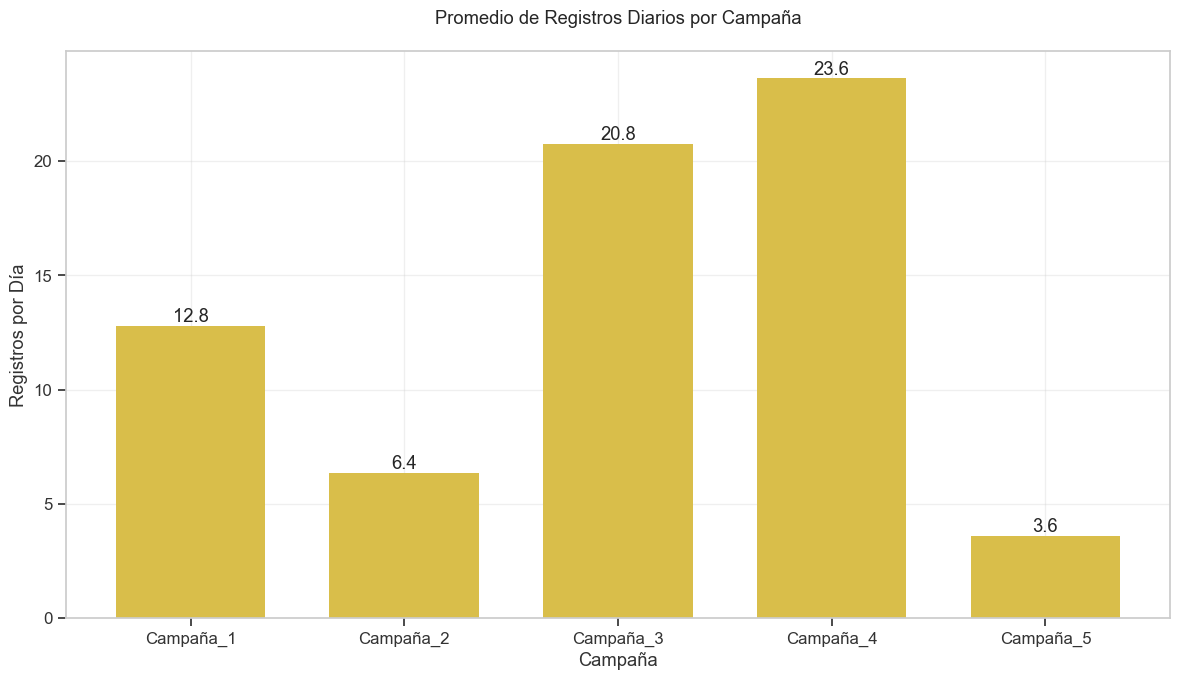

In [17]:
# Mostrar estadísticas de eficiencia
eficiencia = calcular_eficiencia_campanas(campaigns)
mostrar_tabla(
    eficiencia,
    titulo="Estadísticas de eficiencia",
    guardar=True,
    nombre_archivo="eficiencia_campanas.html"
)

# Visualizar registros diarios por campaña
graficar_registros_diarios(campaigns, 'campanas_registros_diarios.png')
plt.show()



### Análisis de Correlación entre Métricas Clave de Campañas

Para comprender las relaciones lineales entre las principales métricas de rendimiento de las campañas, se calcula y visualiza una matriz de correlación.

Primero, se aplica un estilo visual personalizado (`configurar_estilo_peliplat`) para mantener la coherencia gráfica. Luego, se calcula la matriz de correlación de Pearson para las métricas: CTR, Tasa de Conversión, Registros Diarios, Clics y Registros Totales, utilizando el método `.corr()` sobre el DataFrame `campaigns`.

Esta matriz se visualiza mediante un mapa de calor (`seaborn.heatmap`). Las características clave de la visualización incluyen:
- Anotaciones directas de los coeficientes de correlación en cada celda.
- Uso del mapa de color 'coolwarm' para diferenciar correlaciones positivas y negativas.
- Personalización de colores y fuentes según la guía de estilo (`COLORES_PELIPLAT`).

El gráfico resultante, que muestra la intensidad y dirección de las relaciones lineales entre estas métricas, se guarda como `correlacion_metricas_campana.png` y se presenta a continuación.

Figura guardada en: ../reports/figures\correlacion_metricas_campana.png


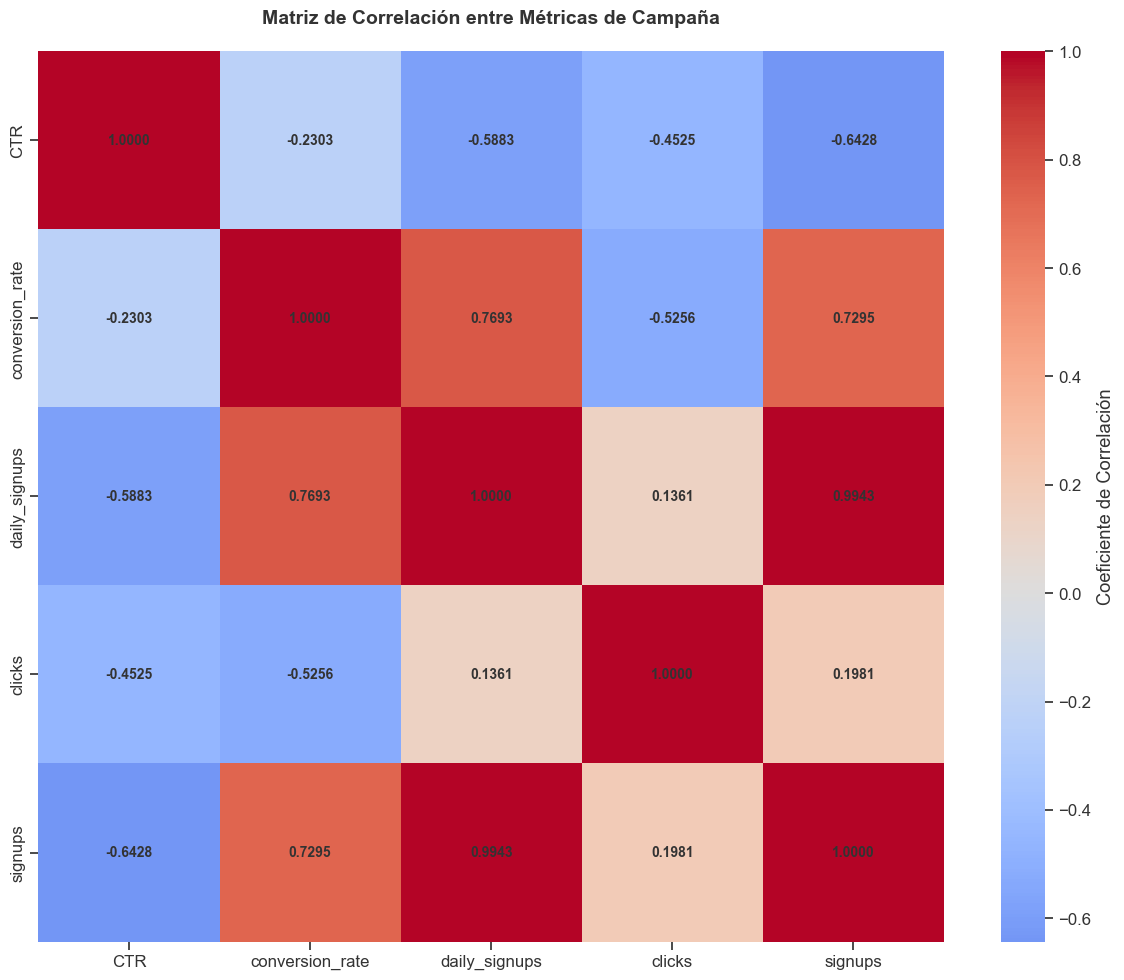

In [18]:
# Importar estilos de utils_peliplat
import sys
sys.path.append('../src')
from utils.utils_peliplat import (
    COLORES_PELIPLAT, 
    configurar_estilo_peliplat,
    guardar_figura
)

# Configurar el estilo de Peliplat
configurar_estilo_peliplat()

# Calcular correlaciones entre métricas clave
correlation_metrics = campaigns[['CTR', 'conversion_rate', 'daily_signups', 'clicks', 'signups']].corr()

# Crear figura con el estilo de Peliplat
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_metrics, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.4f',
            annot_kws={
                'size': 10, 
                'weight': 'bold',
                'color': COLORES_PELIPLAT['texto']
            },
            cbar_kws={
                'label': 'Coeficiente de Correlación'
            })

# Configurar título con el estilo de Peliplat
plt.title('Matriz de Correlación entre Métricas de Campaña', 
          pad=20, 
          fontsize=14, 
          color=COLORES_PELIPLAT['texto'],
          weight='bold')

# Ajustar el color del label de la barra de color después de crear el heatmap
plt.gcf().axes[-1].yaxis.label.set_color(COLORES_PELIPLAT['texto'])

# Ajustar márgenes
plt.tight_layout()

# Guardar usando la función de utils_peliplat
guardar_figura(plt.gcf(), 'correlacion_metricas_campana.png')
plt.show()

### Definición y Clasificación de Campañas por Eficiencia

Se introduce una métrica de 'Eficiencia' personalizada, calculada como el cociente entre la Tasa de Conversión y el CTR (`conversion_rate / CTR`). Esta métrica busca relacionar la capacidad de una campaña para convertir clics en registros con su tasa de clics inicial.

A continuación, las campañas se clasifican en categorías ('Baja', 'Media', 'Alta Eficiencia') utilizando rangos definidos manualmente para la métrica de eficiencia calculada (`pd.cut`).

Finalmente, se prepara y presenta una tabla resumen (`mostrar_tabla`). Esta tabla incluye:
- Nombre de la campaña.
- Métricas clave (CTR, Tasa de Conversión, Registros, Clics).
- La métrica de 'Eficiencia' calculada.
- La 'Categoría' de eficiencia asignada.

Las columnas numéricas relevantes se formatean para una mejor presentación, y la tabla se ordena descendentemente por el valor de 'Eficiencia'. La tabla resultante se titula "Clasificación de Campañas por Eficiencia" y se guarda en formato HTML (`clasificacion_campanas.html`).

In [19]:
# Calcular eficiencia para cada campaña
campaigns['eficiencia'] = campaigns['conversion_rate'] / campaigns['CTR']

# Definir los límites de eficiencia manualmente para que tenga más sentido
eficiencia_bins = [0, 50, 120, float('inf')]
eficiencia_labels = ['Baja Eficiencia', 'Eficiencia Media', 'Alta Eficiencia']

# Categorizar campañas usando cut en lugar de qcut
campaigns['tipo_campana'] = pd.cut(campaigns['eficiencia'], 
                                 bins=eficiencia_bins,
                                 labels=eficiencia_labels)

# Crear tabla con todas las métricas relevantes
tabla_campanas = campaigns[['name', 'CTR', 'conversion_rate', 'signups', 'clicks', 'eficiencia', 'tipo_campana']].copy()

# Ordenar por eficiencia de mayor a menor
tabla_campanas = tabla_campanas.sort_values('eficiencia', ascending=False)

# Formatear las columnas para mejor visualización
tabla_campanas['CTR'] = tabla_campanas['CTR'].apply(lambda x: f"{x:.1f}%")
tabla_campanas['conversion_rate'] = tabla_campanas['conversion_rate'].apply(lambda x: f"{x:.1f}%")
tabla_campanas['eficiencia'] = tabla_campanas['eficiencia'].apply(lambda x: f"{x:.1f}x")

# Renombrar columnas para mejor presentación
tabla_campanas = tabla_campanas.rename(columns={
    'name': 'Campaña',
    'CTR': 'CTR',
    'conversion_rate': 'Tasa de Conversión',
    'signups': 'Registros',
    'clicks': 'Clicks',
    'eficiencia': 'Eficiencia',
    'tipo_campana': 'Categoría'
})

# Mostrar tabla con estilo Peliplat
mostrar_tabla(
    tabla_campanas,
    titulo="Clasificación de Campañas por Eficiencia",
    guardar=True,
    nombre_archivo="clasificacion_campanas.html"
)


Clasificación de Campañas por Eficiencia


,Campaña,CTR,Tasa de Conversión,Registros,Clicks,Eficiencia,Categoría
3,Campaña_4,0.1%,23.4%,189,809,299.5x,Alta Eficiencia
2,Campaña_3,0.2%,22.8%,166,729,129.4x,Alta Eficiencia
0,Campaña_1,0.1%,13.3%,128,961,116.8x,Eficiencia Media
1,Campaña_2,0.2%,19.8%,70,353,109.6x,Eficiencia Media
4,Campaña_5,0.2%,5.7%,54,948,33.5x,Baja Eficiencia


Tabla guardada en HTML: ../reports/tables\clasificacion_campanas.html
Tabla guardada en PNG: ../reports/tables\clasificacion_campanas.png


### Visualización Integrada: Rendimiento y Eficiencia de Campañas

Se genera un gráfico de dispersión avanzado para visualizar simultáneamente el rendimiento y la eficiencia de las campañas, aplicando el estilo visual configurado.

El gráfico presenta:
- **Eje X:** Tasa de Clics (CTR).
- **Eje Y:** Tasa de Conversión.
- **Puntos:** Cada punto representa una campaña.
    - La **posición** indica su CTR y Tasa de Conversión.
    - El **tamaño** del punto es proporcional al número total de registros (`signups`) obtenidos.
    - El **color** del punto indica la categoría de eficiencia de la campaña.
- **Zonas de Eficiencia:** El fondo del gráfico se divide en áreas sombreadas (Baja, Media, Alta Eficiencia) basadas en la métrica `Eficiencia = Tasa de Conversión / CTR`. Líneas discontinuas marcan los límites entre estas zonas. Los colores de las zonas coinciden con los colores de los puntos de las campañas correspondientes.
- **Anotaciones:** Etiquetas de texto junto a cada punto detallan el nombre de la campaña, su CTR, Tasa de Conversión y el valor numérico de su eficiencia.

Se incluyen elementos estándar como título, etiquetas de ejes, leyenda (para las zonas de eficiencia), y una grilla. Los límites de los ejes se ajustan para enfocar la visualización en el área de interés. Finalmente, el gráfico se guarda como `rendimiento_campanas_eficiencia.png` y se muestra a continuación.

Figura guardada en: ../reports/figures\rendimiento_campanas_eficiencia.png


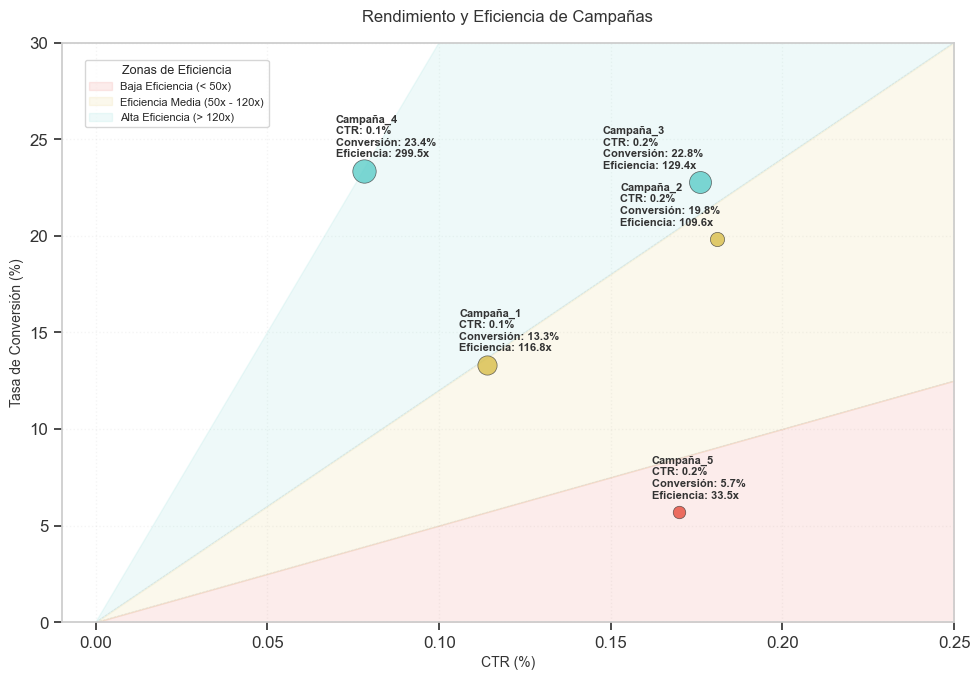

In [20]:
from utils.utils_peliplat import (
    COLORES_PELIPLAT, 
    configurar_estilo_peliplat,
    guardar_figura
)

# Configurar el estilo de Peliplat
configurar_estilo_peliplat()

# Crear el gráfico
plt.figure(figsize=(10, 7))

# Definir los límites de eficiencia
eficiencia_bins = [0, 50, 120, 300]  # Cambiamos inf por 300 para tener un límite superior definido

# Crear áreas sombreadas para las zonas de eficiencia
x_range = np.linspace(0, 0.25, 100)

# Dibujar las áreas de eficiencia
for i in range(len(eficiencia_bins)-1):
    y_lower = x_range * eficiencia_bins[i]
    y_upper = x_range * eficiencia_bins[i+1]
    
    if i == 0:
        label = f'Baja Eficiencia (< 50x)'
        color = COLORES_PELIPLAT['accent']
    elif i == 1:
        label = f'Eficiencia Media (50x - 120x)'
        color = COLORES_PELIPLAT['amarillo']
    else:
        label = f'Alta Eficiencia (> 120x)'
        color = COLORES_PELIPLAT['turquesa']
        
    plt.fill_between(x_range, y_lower, y_upper, 
                     alpha=0.1,
                     color=color,
                     label=label,
                     zorder=1)  # Aseguramos que las áreas estén detrás de los puntos
    
    # Añadir líneas de eficiencia
    plt.plot(x_range, x_range * eficiencia_bins[i], '--', 
            color=COLORES_PELIPLAT['gris_medio'], 
            alpha=0.5,
            linewidth=0.5,
            zorder=2)

# Scatter plot con colores según eficiencia
for name, row in campaigns.iterrows():
    eficiencia = row['conversion_rate'] / row['CTR']
    if eficiencia > 120:
        color = COLORES_PELIPLAT['turquesa']
    elif eficiencia > 50:
        color = COLORES_PELIPLAT['amarillo']
    else:
        color = COLORES_PELIPLAT['accent']
        
    plt.scatter(row['CTR'], 
               row['conversion_rate'],
               s=row['signups']*1.5,
               alpha=0.8,
               color=color,
               edgecolor=COLORES_PELIPLAT['gris_oscuro'],
               linewidth=0.5,
               zorder=3)

# Etiquetas de las campañas
for _, row in campaigns.iterrows():
    eficiencia = row['conversion_rate'] / row['CTR']
    xytext = (-70, 10) if row['name'] in ['Campaña_2', 'Campaña_3'] else (-20, 10)
    
    plt.annotate(f"{row['name']}\nCTR: {row['CTR']:.1f}%\nConversión: {row['conversion_rate']:.1f}%\nEficiencia: {eficiencia:.1f}x", 
                (row['CTR'], row['conversion_rate']),
                xytext=xytext,
                textcoords='offset points',
                fontsize=8,
                color=COLORES_PELIPLAT['texto'],
                weight='bold')

# Ejes y título
plt.xlabel('CTR (%)', fontsize=10, color=COLORES_PELIPLAT['texto'])
plt.ylabel('Tasa de Conversión (%)', fontsize=10, color=COLORES_PELIPLAT['texto'])
plt.title('Rendimiento y Eficiencia de Campañas',
          pad=15,
          fontsize=12,
          color=COLORES_PELIPLAT['texto'])

# Solo una leyenda para las zonas de eficiencia
plt.legend(title='Zonas de Eficiencia',
          title_fontsize=9,
          fontsize=8,
          loc='upper left',
          bbox_to_anchor=(0.02, 0.98),
          frameon=True,
          edgecolor=COLORES_PELIPLAT['gris_medio'])

# Grid y formato
plt.grid(True, linestyle=':', alpha=0.2, color=COLORES_PELIPLAT['gris_medio'])

# Establecer límites de los ejes
plt.xlim(-0.01, 0.25)
plt.ylim(0, 30)

# Ajustar márgenes
plt.tight_layout()

# Guardar la figura
guardar_figura(plt.gcf(), 'rendimiento_campanas_eficiencia.png')
plt.show()